# Laboratorio 4 Predicciones de palabras 
### Diego Alegría, Ayleen Rubio, Mario Sarmientos, Andrés Say


## Instalación de librerías

In [ ]:
!pip install PyDrive
!pip install nltk==3.6.2
!pip install textblob


     |████████████████████████████████| 1.5 MB 5.2 MB/s 
  Attempting uninstall: nltk
    Found existing installation: nltk 3.2.5
    Uninstalling nltk-3.2.5:
      Successfully uninstalled nltk-3.2.5


## Importación de librerías

In [ ]:
from google.colab import files
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
from google.colab import drive
from nltk.corpus import stopwords
import nltk
from nltk.tokenize import word_tokenize
from textblob import TextBlob
import textblob
drive.mount('/content/drive')
nltk.download('stopwords')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Importación de Dataset

In [10]:
f = open("/content/drive/MyDrive/Lab4DS/en_US.blogs.txt", "r")
file1 = f.readlines()
f.close()
f = open("/content/drive/MyDrive/Lab4DS/en_US.news.txt", "r")
file2 = f.readlines()
f.close()
f = open("/content/drive/MyDrive/Lab4DS/en_US.twitter.txt", "r")
file3 = f.readlines()
f.close()

discriminante1=round(len(file1)*0.05)
discriminante2=round(len(file2)*0.05)
discriminante3=round(len(file3)*0.05)

file1=file1[0:discriminante1]

file2=file2[0:discriminante2]

file3=file3[0:discriminante3]


El set de datos está compuesto por información escrita de diferentes fuentes; de blogs, de noticias y de publicaciones de Twitter, todas de estas en ingles. Esta información presenta una gran variedad lingüística debido a su naturaleza, es decir, las variaciones en el lenguaje natural dependen de su origen, esto implica que las publicaciones de twitter tendrán un lenguaje y forma de expresarse distinto al que se esperaría en información de un noticiero, esto mismo aplica para la información de un blog; además que en este último, la forma de expresarse variará dependiendo del tipo de blog del cuál se haya extraído la información. Debido a la cantidad de información de los tres archivos, se extrajo el 5% de cada uno de ellos y se va a concatenar luego de hacer un análisis exploratorio para poder manejarlos en uno solo.

## Limpieza de datos

### Pasando todo a minúscula (Con list comprehension)

In [11]:
file1=[i.lower() for i in file1]
file2=[i.lower() for i in file2]
file3=[i.lower() for i in file3]


### Eliminación de signos de puntuación y caracteres especiales

In [12]:

def remove_punc(string):
  punc = '''!()-[]{};:'"\,<>./“”?’@#$%^&*_~\n'''
  for ele in string:
    if ele in punc:
      string = string.replace(ele,"")
  return string
file1 = [remove_punc(i) for i in file1]
file2 = [remove_punc(i) for i in file2]
file3 = [remove_punc(i) for i in file3]

### Eliminación de stopwords

In [13]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('punkt')

strfile1 = ""
strfile2 = ""
strfile3 = ""
def newFile (filen,originalFile):
  for word in originalFile:
    filen+=word
  return filen

strfile1 = newFile(strfile1,file1)
strfile2 = newFile(strfile2,file2)
strfile3 = newFile(strfile3,file3)

stop_words = set(stopwords.words('english'))

filtered_1 = []
filtered_2 = []
filtered_3 = []

def delStopWords (fileName):
  word_tokens = word_tokenize(fileName)
  filtered_sentence = [w for w in word_tokens if not w.lower() in stop_words]
  filtered_sentence = []

  for w in word_tokens:
    if w not in stop_words:
      filtered_sentence.append(w)
  return filtered_sentence

filtered_1 = delStopWords(strfile1)
filtered_2 = delStopWords(strfile2)
filtered_3 = delStopWords(strfile3)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


#### Eliminación de palabras muy cortas o muy largas
Esto se hace para eliminar emoticonos, url o similares

In [14]:
def cleaner (fileName, originalFile):
  for palabra in originalFile:
    if (len(palabra)>=3 and len(palabra)<18):
      fileName.append(palabra)
  return fileName

finalFile1 = []
finalFile2 = []
finalFile3 = []

finalFile1 = cleaner(finalFile1,filtered_1)
finalFile2 = cleaner(finalFile2,filtered_2)
finalFile3 = cleaner(finalFile3,filtered_3)

## Visualización de archivos luego de la limpieza de datos

### Blogs luego de limpieza de datos

In [15]:
print(file1[0:10])
print(finalFile1[0:10])

['in the years thereafter most of the oil fields and platforms were named after pagan gods', 'we love you mr brown', 'chad has been awesome with the kids and holding down the fort while i work later than usual the kids have been busy together playing skylander on the xbox together after kyan cashed in his  from his piggy bank he wanted that game so bad and used his gift card from his birthday he has been saving and the money to get it he never taps into that thing either that is how we know he wanted it so bad we made him count all of his money to make sure that he had enough it was very cute to watch his reaction when he realized he did he also does a very good job of letting lola feel like she is playing too by letting her switch out the characters she loves it almost as much as him', 'so anyways i am going to share some home decor inspiration that i have been storing in my folder on the puter i have all these amazing images stored away ready to come to life when we get our home', 'w

### Noticias luego de limpieza de datos

In [16]:
print(file2[0:10])
print(finalFile2[0:10])

['he wasnt home alone apparently', 'the st louis plant had to close it would die of old age workers had been making cars there since the onset of mass automotive production in the 1920s', 'wsus plans quickly became a hot topic on local online sites though most people applauded plans for the new biomedical center many deplored the potential loss of the building', 'the alaimo group of mount holly was up for a contract last fall to evaluate and suggest improvements to trenton water works but campaign finance records released this week show the two employees donated a total of 4500 to the political action committee pac partners for progress in early june partners for progress reported it gave more than 10000 in both direct and inkind contributions to mayor tony mack in the two weeks leading up to his victory in the mayoral runoff election june 15', 'and when its often difficult to predict a laws impact legislators should think twice before carrying any bill is it absolutely necessary is it

### Twitter luego de limpieza de datos

In [17]:
print(file3[0:10])
print(finalFile3[0:10])

['how are you btw thanks for the rt you gonna be in dc anytime soon love to see you been way way too long', 'when you meet someone special youll know your heart will beat more rapidly and youll smile for no reason', 'theyve decided its more fun if i dont', 'so tired d played lazer tag  ran a lot d ughh going to sleep like in 5 minutes ', 'words from a complete stranger made my birthday even better ', 'first cubs game ever wrigley field is gorgeous this is perfect go cubs go', 'i no i get another day off from skool due to the wonderful snow  and this wakes me updamn thing', 'im coo jus at work hella tired r u ever in cali', 'the new sundrop commercial hehe love at first sight', 'we need to reconnect this week']
['btw', 'thanks', 'gon', 'anytime', 'soon', 'love', 'see', 'way', 'way', 'longwhen']


### Unión de todos los archivos luego de la limpieza
Los archivos finales serán almacenados en uno solo para poder realizar los análisis posteriores al análisis exploratorio

In [19]:
finalFile = finalFile1+finalFile2+finalFile3


list

creacion de txt con datos limpiados

In [24]:
str1 = " "   
content =str1.join(finalFile)

In [26]:
traintxt = open("lab4data.txt","w+",encoding="utf-8")
traintxt.write(content)

19151671

## Análisis exploratorio

### Blogs

#### Frecuencia de palabras
En el data frame a continuación se mostrará las 10 palabras con mayor frecuencia en el archivo de blogs

In [ ]:
word_counter_file1 = {} #Crear un diccionario con las palabras y su respectiva frecuencia

for word in finalFile1:
  if word in word_counter_file1.keys():
    word_counter_file1[word][0]+=1
  else:
    word_counter_file1[word]=[1]

In [ ]:
import pandas as pd
dfFile1 = pd.DataFrame.from_dict(word_counter_file1).transpose() #Crear un data frame con las palabras y su frecuencia
dfFile1.columns = ["freq"]
dfFile1.sort_values(["freq"],ascending = False, inplace=True)
dfFile1.head(10) #Mostrar las 10 palabras con mayor frecuencia

,freq
one,5798
like,4781
time,4189
would,4027
get,3503
know,2940
people,2800
dont,2670
new,2653
also,2649


#### Histograma con las 5 palabras que más se repiten
Como puede observarse a continuación, las 5 palabras que más se repiten son: one, like, time, would y get

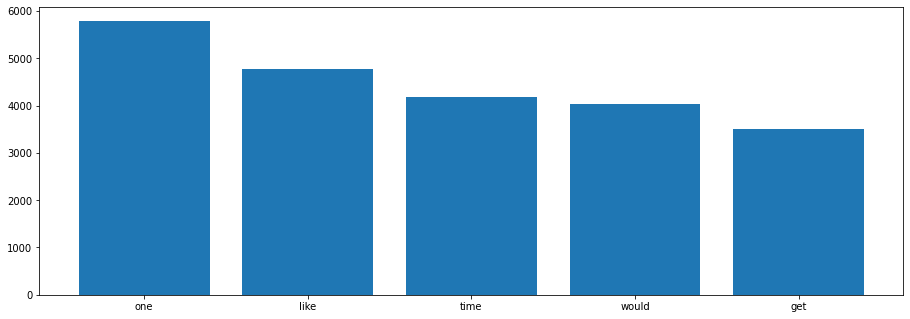

In [ ]:
import matplotlib.pyplot as plt
def plot_bar(data=dfFile1,top=5):
  fig = plt.figure()
  ax = fig.add_axes([0,0,2,1])
  ax.bar(x =dfFile1.iloc[:top,:].index, height = dfFile1.iloc[:top,0].values)
  plt.show()

plot_bar(data=dfFile1,top=5)

#### Nube de palabras
A continuación se mostrará una nube de palabras con las palabras del archivo de blogs

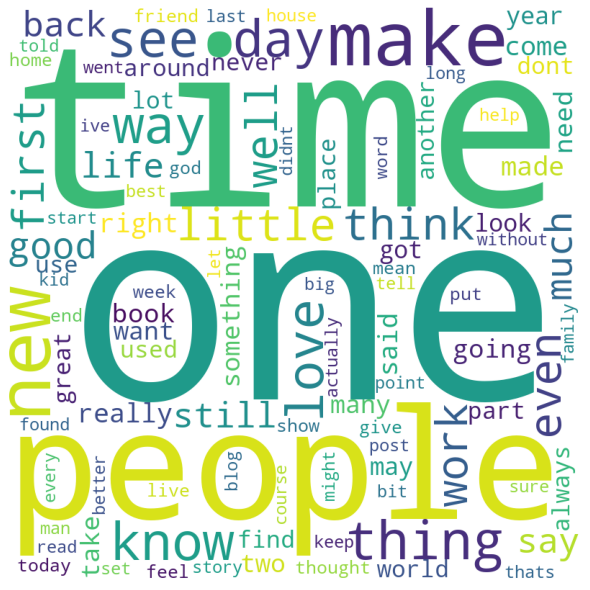

In [ ]:
from wordcloud import WordCloud, ImageColorGenerator

finalFile1str = "" #Convertir la lista en la que se encuentran los datos de los blogs en formato string para poder realizar una nube de palabras
for word in finalFile1:
    finalFile1str+=(word+" ")

word_cloud = WordCloud(height=800, width=800, background_color = 'white', max_words = 100, min_font_size = 5).generate(finalFile1str)

#word_cloud.to_file("./img/wordCloudBlog.png")

plt.figure(figsize=(10,8))
plt.imshow(word_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

### News 

#### Frecuencia de palabras
En el data frame a continuación se mostrará las 10 palabras con mayor frecuencia en el archivo de news

In [ ]:
word_counter_file2 = {} #Crear un diccionario con las palabras y su respectiva frecuencia

for word in finalFile2:
  if word in word_counter_file2.keys():
    word_counter_file2[word][0]+=1
  else:
    word_counter_file2[word]=[1]

In [ ]:
dfFile2 = pd.DataFrame.from_dict(word_counter_file2).transpose() #Crear un data frame con las palabras y su frecuencia
dfFile2.columns = ["freq"]
dfFile2.sort_values(["freq"],ascending = False, inplace=True)
dfFile2.head(10) #Mostrar las 10 palabras con mayor frecuencia

,freq
said,10493
one,3831
would,3585
new,3283
also,2877
two,2850
first,2638
last,2459
year,2447
like,2430


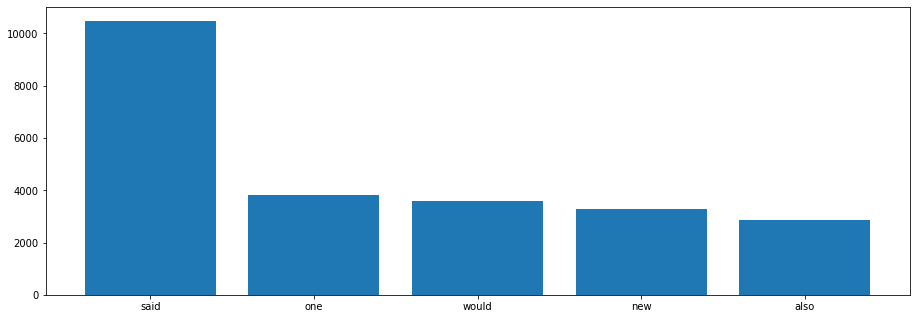

In [ ]:
def plot_bar(data=dfFile2,top=5):
  fig = plt.figure()
  ax = fig.add_axes([0,0,2,1])
  ax.bar(x =dfFile2.iloc[:top,:].index, height = dfFile2.iloc[:top,0].values)
  plt.show()

plot_bar(data=dfFile2,top=5)

#### Nube de palabras
A continuación se mostrará una nube de palabras con las palabras del archivo de news

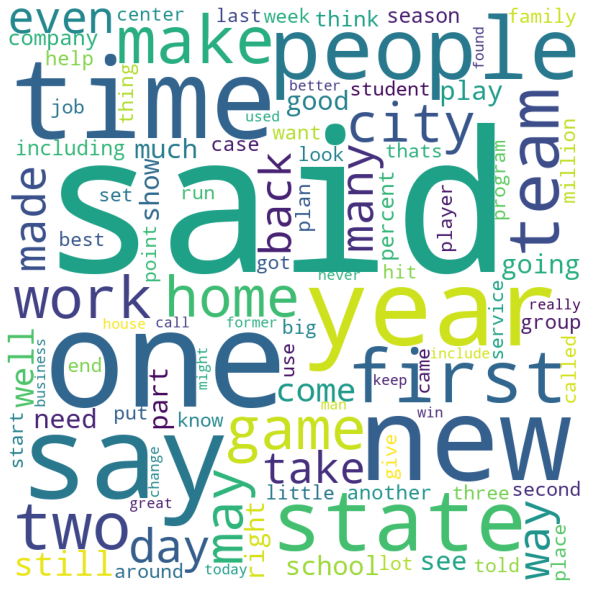

In [ ]:
finalFile2str = "" #Convertir la lista en la que se encuentran los datos de los blogs en formato string para poder realizar una nube de palabras
for word in finalFile2:
    finalFile2str+=(word+" ")

word_cloudnews = WordCloud(height=800, width=800, background_color = 'white', max_words = 100, min_font_size = 5).generate(finalFile2str)

plt.figure(figsize=(10,8))
plt.imshow(word_cloudnews)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

### Twitter

#### Frecuencia de palabras
En el data frame a continuación se mostrará las 10 palabras con mayor frecuencia en el archivo de post de twitter

In [ ]:
word_counter_file3 = {} #Crear un diccionario con las palabras y su respectiva frecuencia

for word in finalFile3:
  if word in word_counter_file3.keys():
    word_counter_file3[word][0]+=1
  else:
    word_counter_file3[word]=[1]

In [ ]:
dfFile3 = pd.DataFrame.from_dict(word_counter_file3).transpose() #Crear un data frame con las palabras y su frecuencia
dfFile3.columns = ["freq"]
dfFile3.sort_values(["freq"],ascending = False, inplace=True)
dfFile3.head(10) #Mostrar las 10 palabras con mayor frecuencia

,freq
like,5787
get,5243
love,4596
dont,3826
good,3707
know,3676
day,3581
one,3418
new,3235
see,3152


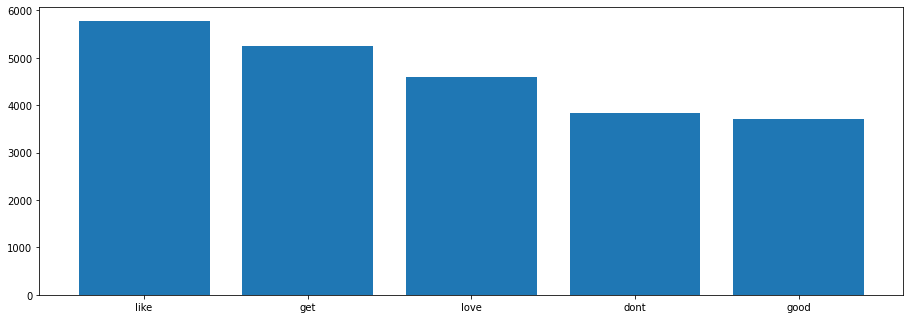

In [ ]:
def plot_bar(data=dfFile3,top=5):
  fig = plt.figure()
  ax = fig.add_axes([0,0,2,1])
  ax.bar(x =dfFile3.iloc[:top,:].index, height = dfFile3.iloc[:top,0].values)
  plt.show()

plot_bar(data=dfFile3,top=5)

#### Nube de palabras
A continuación se mostrará una nube de palabras con las palabras del archivo de post de twitter

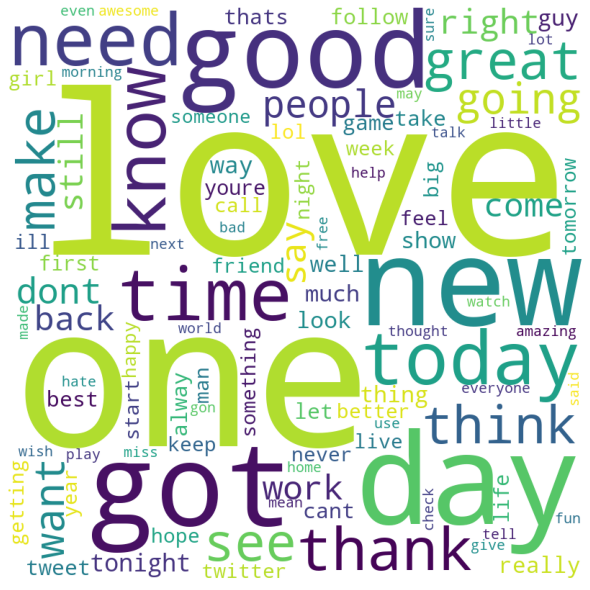

In [ ]:
finalFile3str = "" #Convertir la lista en la que se encuentran los datos de los blogs en formato string para poder realizar una nube de palabras
for word in finalFile3:
    finalFile3str+=(word+" ")

word_cloudtwitter = WordCloud(height=800, width=800, background_color = 'white', max_words = 100, min_font_size = 5).generate(finalFile3str)

plt.figure(figsize=(10,8))
plt.imshow(word_cloudtwitter)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

## Generación de N-gramas

Unigrama

Se realiza el unigrama y se muestran los primeros 10 de la lista

In [ ]:
from nltk.util import ngrams
unigram = [j for i in range(len(file_final)) for j in ngrams(file_final[i].split(),1)]

for i in unigram[0:10]:
  print(i)

('in',)
('the',)
('years',)
('thereafter,',)
('most',)
('of',)
('the',)
('oil',)
('fields',)
('and',)


 Bigrama

In [ ]:
Se realiza el bigrama y se muestran los primeros 10 de la lista 

In [ ]:

bigram = [j for i in range(len(file_final)) for j in ngrams(file_final[i].split(),2)]

for i in bigram[0:10]:
  print(i)


('in', 'the')
('the', 'years')
('years', 'thereafter,')
('thereafter,', 'most')
('most', 'of')
('of', 'the')
('the', 'oil')
('oil', 'fields')
('fields', 'and')
('and', 'platforms')


Trigram

In [ ]:
trigram = [j for i in range(len(file_final)) for j in ngrams(file_final[i].split(),3)]

for i in trigram[0:10]:
  print(i)

('in', 'the', 'years')
('the', 'years', 'thereafter,')
('years', 'thereafter,', 'most')
('thereafter,', 'most', 'of')
('most', 'of', 'the')
('of', 'the', 'oil')
('the', 'oil', 'fields')
('oil', 'fields', 'and')
('fields', 'and', 'platforms')
('and', 'platforms', 'were')


## Modelo

In [ ]:
def build_model(vocab_size, embedding_dim, rnn_units, batch_size): #modelo a tres capas ocultas
  model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim,
                              batch_input_shape=[batch_size, None]),
    tf.keras.layers.GRU(rnn_units,
                        return_sequences=True,
                        stateful=True,
                        recurrent_initializer='glorot_uniform'),
    tf.keras.layers.Dense(vocab_size)
  ])
  return model

NameError: ignored